In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(data, labels, true_betas, train_betas=None):
    print("True Betas: ", true_betas)
    plt.figure(figsize=(5, 8))
    plt.scatter(data[0][labels==1], data[1][labels==1], label="1")
    plt.scatter(data[0][labels==-1], data[1][labels==-1], label="-1")
    plt.plot([0, 10], [0, - true_betas[0] * 10.0 / true_betas[1]], color='red', label="Decision Boundary")
    plt.plot([0, true_betas[0]], [0, true_betas[1]], '--', color='red', label="True Betas")
    if train_betas is not None:
        plt.plot([0, 10], [0, - train_betas[0] * 10.0 / train_betas[1]], color='green', label="Found Boundary")
        plt.plot([0, train_betas[0]], [0, train_betas[1]], '--', color='green', label="Found Betas")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.ylim(-7,10)
    plt.legend(borderaxespad=0., loc=2, bbox_to_anchor=(1.05, 1))
    plt.show()

## Assignment 1
#### Functions you should implement

In [2]:
def sigmoid(x, b):
    """
    :param x: 1D-array, features vector for one sample
    :param b: 1D-array, betas of the model
    :return: sigmoid (logistic) of (x,b)
    """
    return 1.0 / (1 + np.exp(-np.dot(x, b)))

def grad(y, x, b):
    """
    Gradient of log-loss for one sample
    :param y: label of the sample (1 or -1)
    :param x: 1D-array, features vector for the sample
    :param b: 1D-array, betas of the model
    """
    return y*x*(np.exp(-y * x.dot(b))/(1 + np.exp(-y * x.dot(b))))
    return (-y * np.log(sigmoid(x, b)) - (1 - y) * np.log(1 - sigmoid(x, b))).mean()


def loss(X, Y, b):
        h = sigmoid(X, b)
        return (-Y * np.log(h) - (1 - Y) * np.log(1 - h)).mean()
    
def train(Y, X, steps=10, lr=0.001):
    """
    Get optimal betas
    :param Y: 1D-array, labels of all data like [1,1,-1,1,-1,-1,1,...]
    :param X: 2D-array of shape (features number, samples number), i.e. vector of all feature vectors
    :return: 1D-array of size of features number, bettas
    """
    b = np.zeros(X.shape[1])
    for s in range(steps):
        for i in range(len(X)):
            x = X[i]
            y = Y[i]
            gradient = grad(y, x, b)
            b += lr * gradient
        if s%10 == 1:
            print("step: {}, loss: {}".format(s, loss(X, Y, b)))
    return b

#### Execute the next cell to see your result

step: 1, loss: -0.1890599060527067
True Betas:  [ 6 -5]


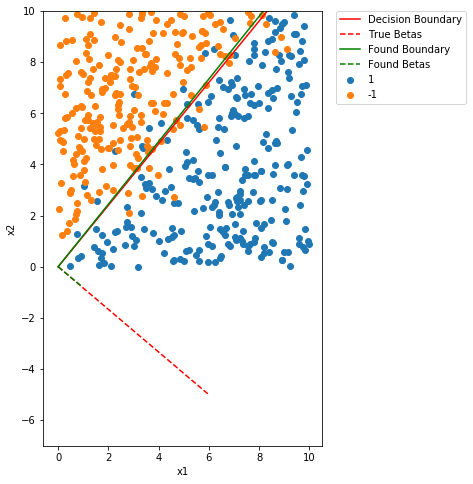

In [3]:
# Generate data
true_betas = np.random.randint(4, 7, 2)  # random betas
true_betas[1] *= -1  # to bring line in positive quarter

data = np.random.uniform(0, 10, 1000).reshape(2, 500)
labels = np.array([np.random.choice([1, -1], p=[sigmoid(x, true_betas/3), 1 - sigmoid(x, true_betas/3)]) for x in data.T])

plot_data(data, labels, true_betas, train(labels, data.T))

#### DON'T execute the next cell
You need example output, to see what kind of figure you should obtain

step: 1, loss: -0.1890599060527067
True Betas:  [ 6 -5]


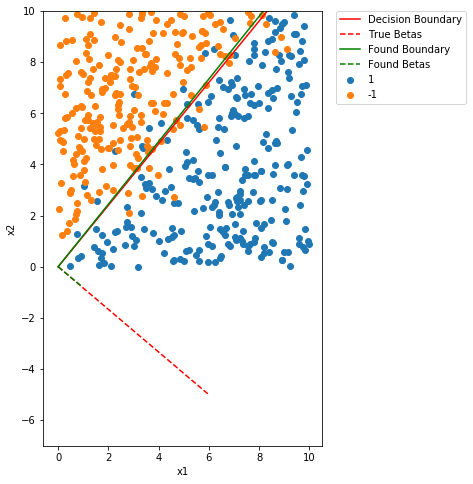

In [4]:
plot_data(data, labels, true_betas, train(labels, data.T))

## Assignment 2
#### 2.1 Plot the history of the loss-function
To do this task, you can do simple modifications in the template I provide.
#### 2.2 Plot level curves  (համապոտենցիալ մակերևույթներ) of loss-function in 2D beta-space